# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [11]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

/Users/iris/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,0,0W4lkclzZThpx3V65bVgig,NaN,NaN,NaN,0.0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,1,AEx2SYEUJmTxVVB18LlCwA,NaN,NaN,NaN,0.0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,2,VR6GpWIda3SfvPC-lg9H3w,NaN,NaN,NaN,0.0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,3,CKC0-MOWMqoeWf6s-szl8g,NaN,NaN,NaN,0.0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,4,ACFtxLv8pGrrxMm6EgjreA,NaN,NaN,NaN,0.0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [15]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text']
documents = df['text'].replace('\n','', regex=True).tolist()
documents = [str(i) for i in documents]
documents = [' '.join(item.split()) for item in documents]

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [17]:
# Make a column and take the values, save to a variable named "target"
df['target']= np.where(df['stars']==5,'perfect','imperfect')
target = df['target'].values

#### You may want to look at the statistic of the target variable

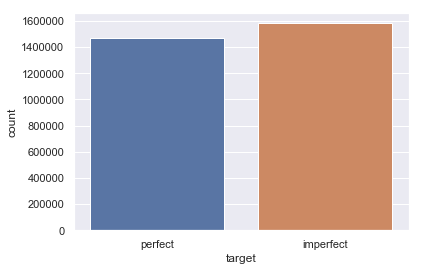

In [19]:
# To be implemented
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df)
plt.show()

### Create training dataset and test dataset

In [21]:
from sklearn.cross_validation import train_test_split

In [25]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
X = documents
y = target
documents_train, documents_test, target_train, target_test = train_test_split(X, y, test_size=0.4)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from string import punctuation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
vectors = vectorizer.fit_transform(documents_train).toarray()
words = vectorizer.get_feature_names()

In [ ]:
# Train the model with your training data
X = vectors
y = target_train

In [ ]:
# Get the vocab of your tfidf
words

In [ ]:
# Use the trained model to transform all the reviews
y_test = target_test
X_test = vectorizer.transform(documents_test)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [ ]:
# To be implemented
import random
import numpy as np
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # for 3D projection to work

def k_means(X, k=5, max_iter=1000):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in random.sample(list(X), k)]
    for i in range(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [euclidean(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)

        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters


def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals


def plot_k_sse(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')


def turn_clusters_into_labels(clusters):
    """Converts clusters dict returned by k_means into X, y (labels)

    Args:
    - clusters - dict mapping cluster centers to observations
    """
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.items():
        for pt in pts:
            new_X.append(pt)
            labels.append(label)
        label += 1
    return np.array(new_X), np.array(labels)


def plot_k_silhouette(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    silhouette_scores = []
    for k in k_values:
        clusters = k_means(X, k=k)
        new_X, labels = turn_clusters_into_labels(clusters)
        silhouette_scores.append(silhouette_score(new_X, labels))

    plt.plot(k_values, silhouette_scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')


def plot_all_2d(X, feature_names, k=3):
    """Generates all possible 2d plots of observations color coded by cluster ID"""
    pairs = list(combinations(range(X.shape[1]), 2))
    fig, axes = plt.subplots(( int(len(pairs)/2) ), 2)
    flattened_axes = [ax for ls in axes for ax in ls]

    for pair, ax in zip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k)


def plot_data_2d(X, plot_labels, ax, k=3):
    """Generates single 2d plot of observations color coded by cluster ID"""
    clusters = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

In [ ]:
clustered_X = k_means(X, k=3, max_iter=1000)

#### Make predictions on all your data

In [ ]:
# To be implemented
pass

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [ ]:
# To be implemented
pass

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [ ]:
# To be implemented
pass

#### Try different k
If you set k == to a different number, how does the top features change?

In [ ]:
# To be implemented
pass

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [ ]:
# To be implemented
pass

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [ ]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
pass

We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [ ]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
pass

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [ ]:
# To be implemented
pass

#### Check the statistic of the target variable

In [ ]:
# To be implemented
pass

### Create training dataset and test dataset

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
pass

### Get NLP representation of the documents

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create TfidfVectorizer, and name it vectorizer
pass

In [ ]:
# Train the model with your training data
pass

In [ ]:
# Get the vocab of your tfidf
pass

In [ ]:
# Use the trained model to transform the test data
pass

In [ ]:
# Use the trained model to transform all the data
pass

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [ ]:
# To be implemented
pass

#### Make predictions on all your data

In [ ]:
# To be implemented
pass

#### Inspect the centroids

In [ ]:
# To be implemented
pass

#### Find the top 10 features for each cluster.

In [ ]:
# To be implemented
pass

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [ ]:
# To be implemented
pass

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

# To be implemented
pass


### Use PCA to transform data (train and test) and get princial components

In [ ]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
pass


### See how much (and how much percentage of) variance the principal components explain

In [ ]:
# To be implemented
pass

In [ ]:
# To be implemented
pass

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [ ]:
# To be implemented
pass

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set
pass

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
pass

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: (insert your comments here)

#### You can plot the coefficients against principal components


In [ ]:
# To be implemented
pass

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set
pass

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
pass

#### Q: What do you see from the training result and the test result?

A: (insert your comments here)

#### You can plot the feature importances against principal components


In [ ]:
# To be implemented
pass

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented